# Dependencies

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from czifile import * # for loading lsm-files
import numpy as np
import os
from os import listdir
from os.path import isfile, isdir, join
import pandas as pd
import seaborn as sns

import scipy.stats
import math
import anndata as ad
from scipy.sparse import csr_matrix

import scipy.optimize as opt

import sys,os
from pathlib import Path
from matplotlib import colors
from matplotlib import cm as cmx
from tqdm import tqdm 

from Code import Main_v2
from Code import Plate_Plotter
from Code.Plate_Viz import *
from Code.Quality_Control import *
from Code.Image_To_MFI import*
from Code import JJ_dataprocess, MetaSAR_Visualization


# Data Generation

In [3]:
ECM_final, Nuclei_final, QC_ECM_final, QC_Nuc_final, QIC_ECM_final, QIC_Nuc_final = JJ_dataprocess.Plate_Bulk_Analysis  (
    dataframe_dir = os.path.join(os.getcwd(), data_dir),
    nuclei_dir = os.path.join(os.getcwd(), data_dir),
    plate_dir = os.path.join(os.getcwd(), data_dir, "..", 'JJ_Plates.xlsx'),
    By = 'JJ',
    display_plot = False
)

Curve fitting raised an error for Gatifloxacin: Cannot calculate a linear regression if all x values are identical

Curve fitting raised an error for Gatifloxacin: Cannot calculate a linear regression if all x values are identical

Curve fitting raised an error for Ciprofloxacin: Cannot calculate a linear regression if all x values are identical

Curve fitting raised an error for Ciprofloxacin: Cannot calculate a linear regression if all x values are identical

Curve fitting raised an error for cmp18: Cannot calculate a linear regression if all x values are identical

Curve fitting raised an error for Tranilast: Cannot calculate a linear regression if all x values are identical

Curve fitting raised an error for cmp18: Cannot calculate a linear regression if all x values are identical

Curve fitting raised an error for Tranilast: Cannot calculate a linear regression if all x values are identical

Curve fitting raised an error for R-(+)-Ofloxacin: Cannot calculate a linear regression if

In [ ]:

ECM_final.to_csv(f'Results/JJ/datasum/ECM_final.csv')
Nuclei_final.to_csv(f'Results/JJ/datasum/Nuclei_final.csv')
QC_ECM_final.to_csv(f'Results/JJ/datasum/QC_ECM_final.csv')
QC_Nuc_final.to_csv(f'Results/JJ/datasum/QC_Nuc_final.csv')
QIC_ECM_final.to_csv(f'Result/JJ/datasum/QIC_ECM_final.csv')
QIC_Nuc_final.to_csv(f'Results/JJ/datasum/QIC_Nuc_final.csv')


# Data Filtering

**I. Z-factor based filtering (Nuc data not included)**

In [2]:
QIC_ECM_final = pd.read_csv(r'Results\JJ\datasum\QIC_ECM_final.csv')
QIC_Nuc_final = pd.read_csv(r'Results\JJ\datasum\QIC_Nuc_final.csv')

In [3]:
QIC_Fib =QIC_ECM_final[QIC_ECM_final["Stain"]=="Fibulin"]
QIC_Col =QIC_ECM_final[QIC_ECM_final["Stain"]=="ECM"]

In [4]:
Col_cols = ['IC50', 'SE', 'Hill_Slope', 'Rsq', 'MSE', 'Compound name', 
       'Stain','Replicate', 'Cell line', 'Experiment', 'By', 'Curve_Type', 'Norm_Type',
            "plate_loc","well_col", "Z_Factor_l_Col"]

Fib_cols = ['IC50', 'SE', 'Hill_Slope', 'Rsq', 'MSE', 'Compound name',
       'Stain','Replicate', 'Cell line', 'Experiment', 'By', 'Curve_Type', 'Norm_Type',
            "plate_loc","well_col", "Z_Factor_l_Fib"]

QIC_Fib_s = QIC_Fib[Fib_cols]
QIC_Col_s = QIC_Col[Col_cols]

In [5]:
QIC_Nuc = QIC_Nuc_final[QIC_Nuc_final["Stain"]=="Nuclei"]

Nuc_cols = ['LD50', 'SE', 'Hill_Slope', 'Rsq', 'MSE', 'Compound name',
       'Stain','Replicate', 'Cell line', 'Experiment', 'By', 'Curve_Type', 'Norm_Type',
        'Z_Factor_Nuclei', 'Z_Factor_l_Nuclei', 'Mean_Z_Factor_Nuclei',
       'Mean_Z_Factor_l_Nuclei', "plate_loc","well_col"]

QIC_Nuc_s = QIC_Nuc[Nuc_cols]

In [6]:
QIC_Col_post1 = MetaSAR_Visualization.Bulk_QC_Function(QIC_Col_s, "IC50")
QIC_Fib_post1 = MetaSAR_Visualization.Bulk_QC_Function(QIC_Fib_s, "IC50")
QIC_Nuc_post1 = MetaSAR_Visualization.Bulk_QC_Function(QIC_Nuc_s, "LD50")

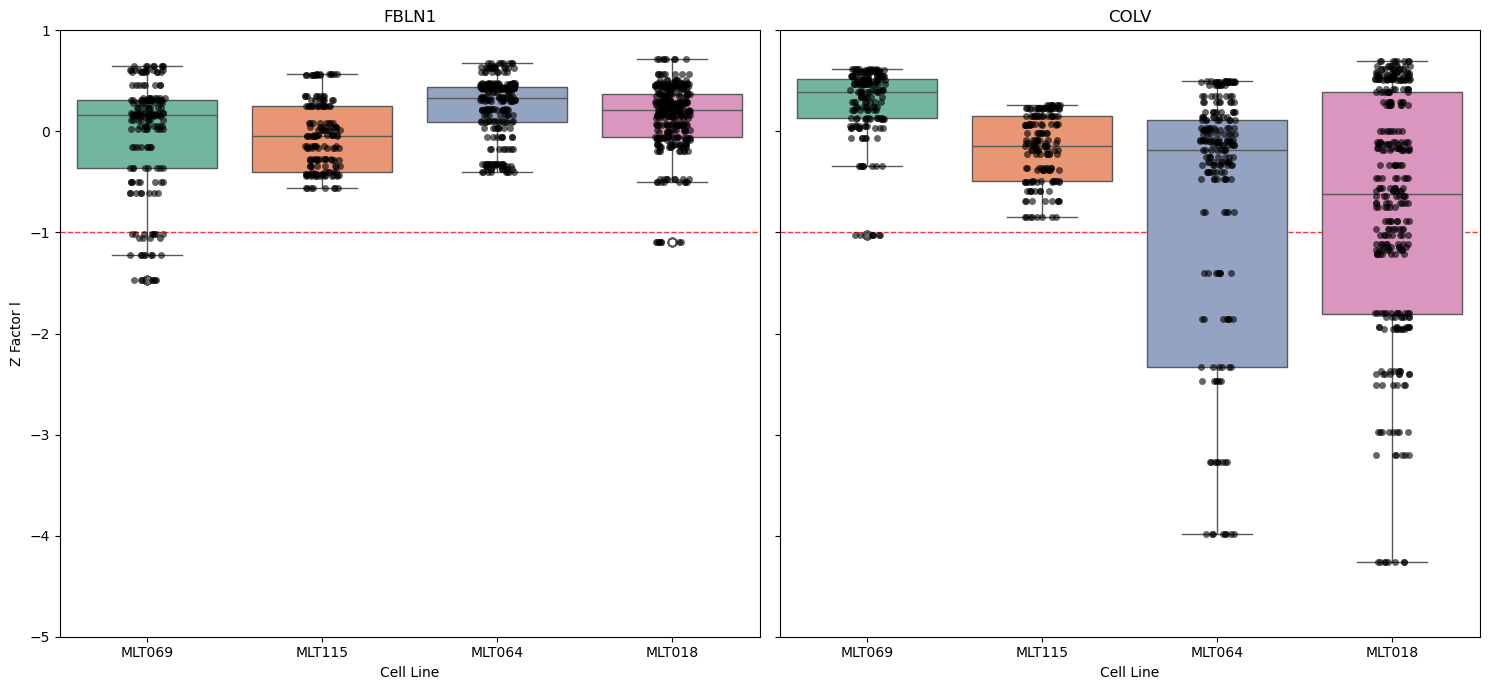

In [7]:
# Create subplots: Z factor l against cell lines
fig, axes = plt.subplots(1,2, figsize=(15, 7), sharey=True)

# Plot for QIC_Col_post1
sns.boxplot(ax=axes[1], x="Cell line", y="Z_Factor_l_Col", data=QIC_Col_post1, palette="Set2")
sns.stripplot(ax=axes[1], x="Cell line", y="Z_Factor_l_Col", data=QIC_Col_post1, color="black", alpha=0.6, jitter=True)
axes[1].set_xlabel("Cell Line")
axes[1].set_ylabel("Z Factor l")
axes[1].set_ylim(-1, 1)
axes[1].set_title("COLV")

# Plot for QIC_Fib_pos1
sns.boxplot(ax=axes[0], x="Cell line", y="Z_Factor_l_Fib", data=QIC_Fib_post1, palette="Set2")
sns.stripplot(ax=axes[0], x="Cell line", y="Z_Factor_l_Fib", data=QIC_Fib_post1, color="black", alpha=0.6, jitter=True)
axes[0].set_xlabel("Cell Line")
axes[0].set_ylabel("Z Factor l")
axes[0].set_ylim(-5, 1)
axes[0].set_title("FBLN1")

# Show the plot
for ax in axes:
    #ax.axhline(0.5, ls='--', lw=1, c='grey', alpha=0.8, zorder=0)
    ax.axhline(-1.0, ls='--', lw=1, c='red', alpha=0.8, zorder=1)
plt.tight_layout()
plt.show()

In [8]:
QIC_Fib_post2 = QIC_Fib_post1[QIC_Fib_post1["Z_Factor_l_Fib"]>-1]
QIC_Col_post2 = QIC_Col_post1[QIC_Col_post1["Z_Factor_l_Col"]>-1]
QIC_Nuc_post2 = QIC_Nuc_post1 # Don't filter Nuclei data based on Z factor: TGFb doesn't affect nuclei counts

In [9]:
QIC_Col_post2["QC_Score_ZFactor_l"] = QIC_Col_post2["Z_Factor_l_Col"].apply(lambda x:
                                                                            1 if x > 0.5 else
                                                                            2 if x > 0 else
                                                                            3 if x < 0 else
                                                                            4 if x < -0.5 else
                                                                            np.nan
                                                                        )
QIC_Fib_post2["QC_Score_ZFactor_l"] = QIC_Fib_post2["Z_Factor_l_Fib"].apply(lambda x:
                                                                            1 if x > 0.5 else
                                                                            2 if x > 0 else
                                                                            3 if x < 0 else
                                                                            4 if x < -0.5 else
                                                                            np.nan
                                                                        )
QIC_Nuc_post2["QC_Score_ZFactor_l"] =QIC_Nuc_post2["Z_Factor_l_Nuclei"].apply(lambda x:
                                                                            1 if x > 0.5 else
                                                                            2 if x > 0 else
                                                                            3 if x < 0 else
                                                                            4 if x < -0.5 else
                                                                            np.nan
                                                                        )

**II. Hill slope-based filtering**

Filter values based on either 'Curve is PL4 (b=1)' or 'Curve is Var with b<0'.


Text(0.5, 1.0, 'Nuclei')

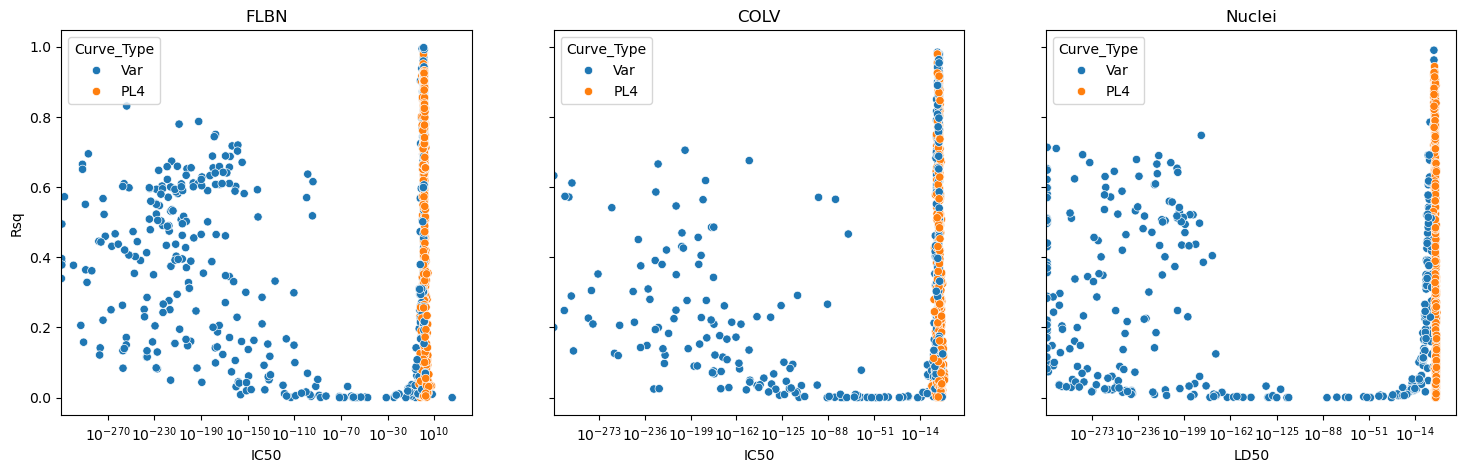

In [10]:
fig, axes = plt.subplots(1,3, figsize=(18, 5), sharey=True)

sns.scatterplot(y="Rsq",x="IC50",data=QIC_Fib_post2,hue="Curve_Type",ax=axes[0])
axes[0].set_xscale('log')
axes[0].set_ylabel("Rsq")
axes[0].set_xlabel("IC50")
axes[0].set_title("FLBN")

sns.scatterplot(y="Rsq",x="IC50",data=QIC_Col_post2,hue="Curve_Type",ax=axes[1])
axes[1].set_xscale('log')
axes[1].set_ylabel("Rsq")
axes[1].set_xlabel("IC50")
axes[1].set_title("COLV")

sns.scatterplot(y="Rsq",x="LD50",data=QIC_Nuc_post2,hue="Curve_Type",ax=axes[2])
axes[2].set_xscale('log')
axes[2].set_ylabel("Rsq")
axes[2].set_xlabel("LD50")
axes[2].set_title("Nuclei")

Filtering Logics:
1. Select all curves with **Curve_Type = "PL4" (4-parameter logistic)**, representing standard 4-parameter logistic (sigmoidal) dose–response fits.  

2. Additionally, select curves with **Curve_Type = "Var"** **and** a **negative Hill_Slope (<0)**, indicating variable-type fits that still show an inhibitory (downward) trend.  

3. Combine both conditions with a logical **OR (|)**, retaining only **PL4 curves** or **Var curves with Hill_Slope < 0** — i.e., curves showing valid inhibitory responses.


In [11]:
QIC_Fib_post3 = QIC_Fib_post2[((QIC_Fib_post2["Curve_Type"] == "PL4") | ((QIC_Fib_post2["Curve_Type"] == "Var") & (QIC_Fib_post2["Hill_Slope"] < 0)))]
QIC_Col_post3 = QIC_Col_post2[((QIC_Col_post2["Curve_Type"] == "PL4") | ((QIC_Col_post2["Curve_Type"] == "Var") & (QIC_Col_post2["Hill_Slope"] < 0)))]
QIC_Nuc_post3 = QIC_Nuc_post2[((QIC_Nuc_post2["Curve_Type"] == "PL4") | ((QIC_Nuc_post2["Curve_Type"] == "Var") & (QIC_Nuc_post2["Hill_Slope"] < 0)))]


Text(0.5, 1.0, 'Nuclei')

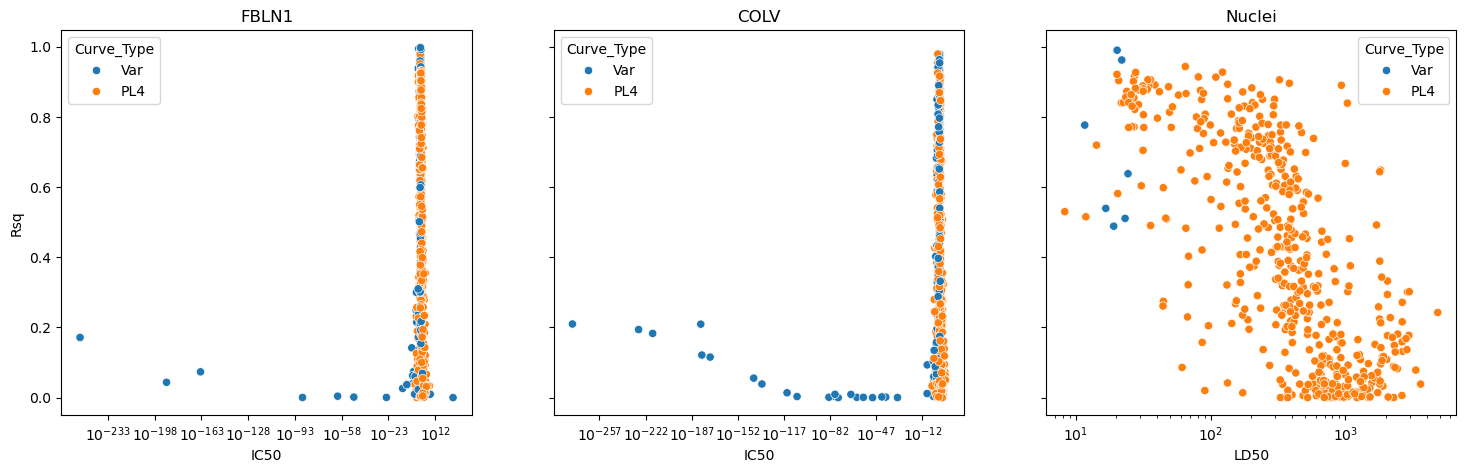

In [12]:
fig, axes = plt.subplots(1,3, figsize=(18, 5), sharey=True)

sns.scatterplot(y="Rsq",x="IC50",data=QIC_Fib_post3,hue="Curve_Type",ax=axes[0],hue_order=["Var", "PL4"])
axes[0].set_xscale('log')
axes[0].set_title("FBLN1")

sns.scatterplot(y="Rsq",x="IC50",data=QIC_Col_post3,hue="Curve_Type",ax=axes[1], hue_order=["Var", "PL4"])
axes[1].set_xscale('log')
axes[1].set_title("COLV")

sns.scatterplot(y="Rsq",x="LD50",data=QIC_Nuc_post3,hue="Curve_Type",ax=axes[2],hue_order=["Var", "PL4"])
axes[2].set_xscale('log')
axes[2].set_title("Nuclei")

# for ax in axes:
#     ax.axhline(0.75, ls='--', lw=1, c='red', alpha=0.8, zorder=0)

**III. Filter values based on Rsq > 0.5 (goodness of fit)**

The **R²** value quantifies how well the fitted curve explains the variability of the observed data.
- **Higher R²** → Better goodness-of-fit 

In [13]:
QIC_Fib_post4 = QIC_Fib_post3[QIC_Fib_post3["Rsq"]>0.5]
QIC_Col_post4 = QIC_Col_post3[QIC_Col_post3["Rsq"]>0.5]
QIC_Nuc_post4 = QIC_Nuc_post3[QIC_Nuc_post3["Rsq"]>0.5]

Text(0.5, 1.0, 'Nuclei')

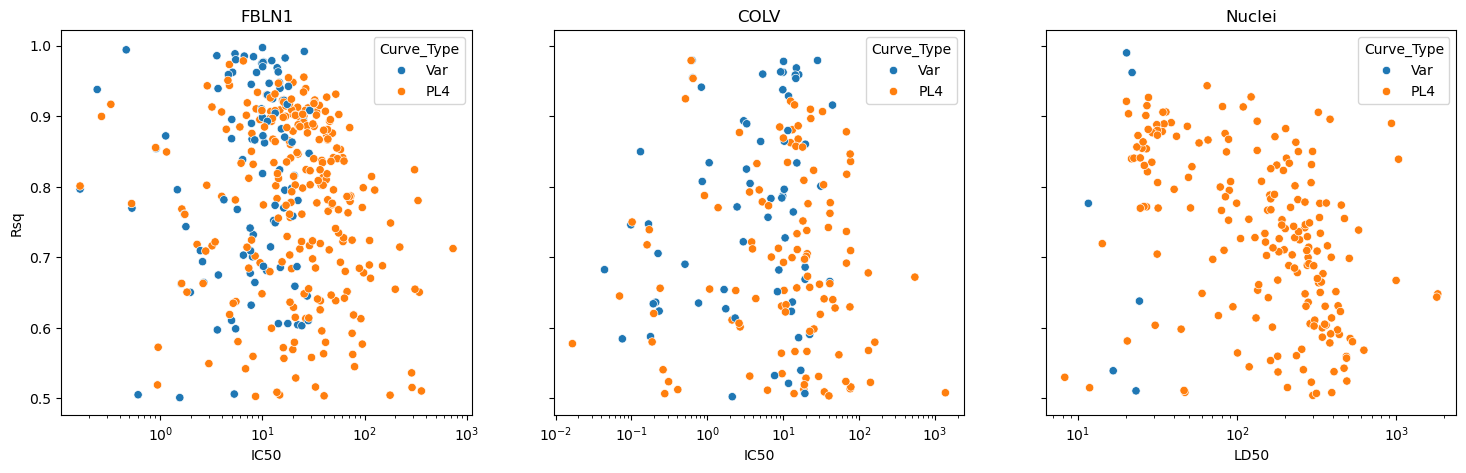

In [14]:
fig, axes = plt.subplots(1,3, figsize=(18, 5), sharey=True)

sns.scatterplot(y="Rsq",x="IC50",data=QIC_Fib_post4,hue="Curve_Type",ax=axes[0],hue_order=["Var", "PL4"])
axes[0].set_xscale('log')
axes[0].set_title("FBLN1")

sns.scatterplot(y="Rsq",x="IC50",data=QIC_Col_post4,hue="Curve_Type",ax=axes[1], hue_order=["Var", "PL4"])
axes[1].set_xscale('log')
axes[1].set_title("COLV")

sns.scatterplot(y="Rsq",x="LD50",data=QIC_Nuc_post4,hue="Curve_Type",ax=axes[2],hue_order=["Var", "PL4"])
axes[2].set_xscale('log')
axes[2].set_title("Nuclei")

In [15]:
QIC_Fib_post4.to_csv(f"Results/JJ/postqc/Fib_postQC_List.csv")
QIC_Col_post4.to_csv(f"Results/JJ/postqc/Col_postQC_List.csv")
QIC_Nuc_post4.to_csv(f"Results/JJ/postqc/Nuc_postQC_List.csv")

# Reducing Batch sizes per Compound

**Use top 3 plates arranged by quality of plate (Rsq). Use only Var values here. Combined with top 3 Rsq fit values. Stratify on cell lines**

In [16]:
fib_out = MetaSAR_Visualization.summarize_qic(QIC_Fib_post4, 'IC50')
Col_out = MetaSAR_Visualization.summarize_qic(QIC_Col_post4, 'IC50')
Nuc_out = MetaSAR_Visualization.summarize_qic(QIC_Nuc_post4, 'LD50')

unknown = False (No toxicity)

Calculate theraputic index (TI)

In [17]:
updated_fib,_,_ = MetaSAR_Visualization.label_toxicity_from_ti(QIC_Nuc_post4, QIC_Col_post4, QIC_Fib_post4, fib_out, target='IC50')
updated_col,_,_ = MetaSAR_Visualization.label_toxicity_from_ti(QIC_Nuc_post4, QIC_Col_post4, QIC_Fib_post4, Col_out, target='IC50')

In [18]:
MetaSAR_fib = updated_fib['MetaSAR_df']
MetaSAR_fib.columns

Index(['Compound name', 'IC50', 'Stdev', 'Mean_Rsq', 'Ns', 'Bestfit_IC50',
       'Bestfit_IC50_stdev', 'Bestfit_IC50_CL', 'TI_log10_min',
       'TI_log10_mean', 'TI_log10_max', 'TI_Marker_compound'],
      dtype='object')

In [19]:
Fib_Result_List_Final = updated_fib['Result_List_Final']
Fib_Result_List_Final.columns

Index(['Compound name', 'Cell line', 'Mean_IC50', 'Stdev_IC50', 'Rsq',
       'Meta_Data', 'Ns', 'TI_log10', 'TI_Marker'],
      dtype='object')

In [20]:
MetaSAR_col = updated_col['MetaSAR_df']
Col_Result_List_Final = updated_col['Result_List_Final']

# Fibulin data ranking plot

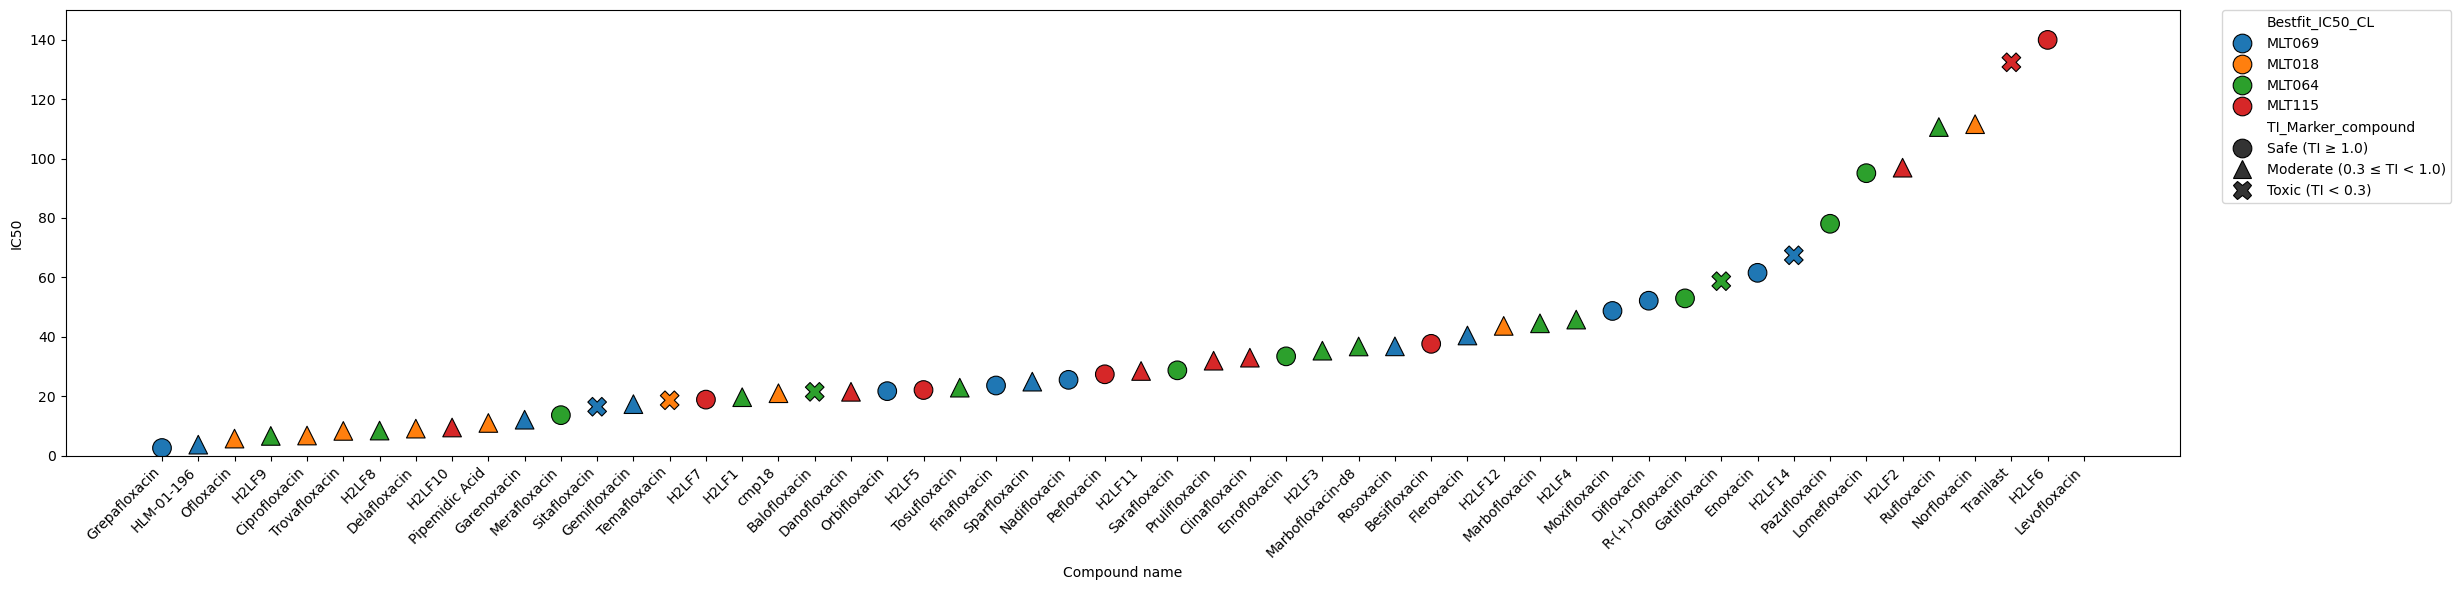

In [ ]:
MetaSAR_fib = MetaSAR_fib.sort_values("IC50", ascending=True)
MetaSAR_fib["TI_Marker_compound"] = MetaSAR_fib["TI_Marker_compound"].fillna("no_TI")

marker_map = {
    "circle": "o",
    "triangle": "^",
    "cross": "X",
    "no_TI": "P"
}

plt.figure(figsize=(22, 6))

ax = sns.scatterplot(
    data=MetaSAR_fib,
    x="Compound name",
    y="IC50",
    hue="Bestfit_IC50_CL",
    style="TI_Marker_compound",
    markers=marker_map,
    s=180,
    edgecolor="black",
    linewidth=0.8,
)

plt.ylim(0, 150)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Get current legend handles
handles, labels = ax.get_legend_handles_labels()

# Build new labels for TI markers
replace_dict = {
    "circle": "Safe (TI ≥ 1.0)",
    "triangle": "Moderate (0.3 ≤ TI < 1.0)",
    "cross": "Toxic (TI < 0.3)",
    "no_TI": "No toxicity data",
}

new_labels = []
for label in labels:
    if label in replace_dict:
        new_labels.append(replace_dict[label])
    else:
        # keep original color labels (cell lines)
        new_labels.append(label)

# Remove old legend
ax.get_legend().remove()

# Add new legend
plt.legend(handles, new_labels, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

plt.show()


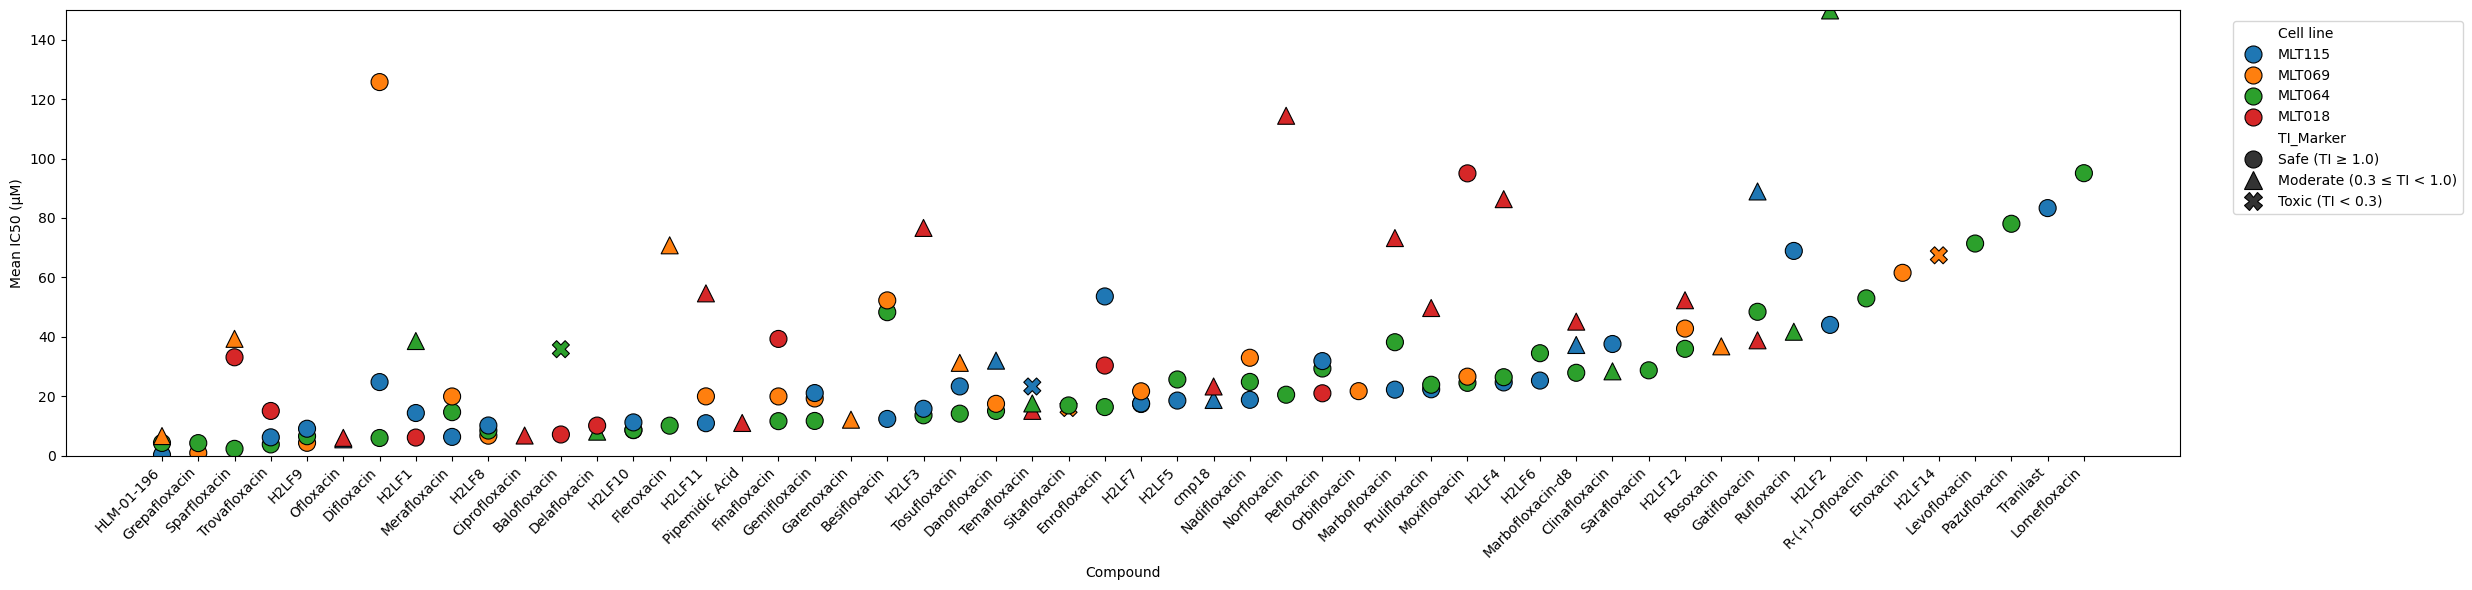

In [42]:
# Assume Fib_Result_List_Final = updated_fib["Result_List_Final"]
fib_plot = Fib_Result_List_Final.copy()

# Sort by potency
fib_plot = fib_plot.sort_values("Mean_IC50", ascending=True)

# Use per–cell line TI marker
# (this column is added by label_toxicity_from_ti)
fib_plot["TI_Marker"] = fib_plot["TI_Marker"].fillna("no_TI")

marker_map = {
    "circle": "o",      # safe
    "triangle": "^",    # moderate
    "cross": "X",       # toxic 
    "no_TI": "P",       # no LD50 data
}

plt.figure(figsize=(22, 6))

ax = sns.scatterplot(
    data=fib_plot,
    x="Compound name",
    y="Mean_IC50",
    hue="Cell line",          # color by fibroblast line
    style="TI_Marker",        # marker by TI category
    markers=marker_map,
    s=150,
    edgecolor="black",
    linewidth=0.8,
)

plt.ylim(0, 150)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Compound")
plt.ylabel("Mean IC50 (μM)")
#plt.title("Fibrosis Mean IC50 with TI-based Toxicity Categorization", fontsize=16)
plt.tight_layout()

# ---- legend relabel for TI categories ----
handles, labels = ax.get_legend_handles_labels()

replace_dict = {
    "circle": "Safe (TI ≥ 1.0)",
    "triangle": "Moderate (0.3 ≤ TI < 1.0)",
    "cross": "Toxic (TI < 0.3)",
    "no_TI": "No LD50 toxicity data",
}

new_labels = [replace_dict.get(l, l) for l in labels]

ax.get_legend().remove()
plt.legend(
    handles,
    new_labels,
    loc="upper left",
    bbox_to_anchor=(1.02, 1),
    frameon=True,
    borderaxespad=0.8,
)

plt.show()


# Collagen data ranking plot

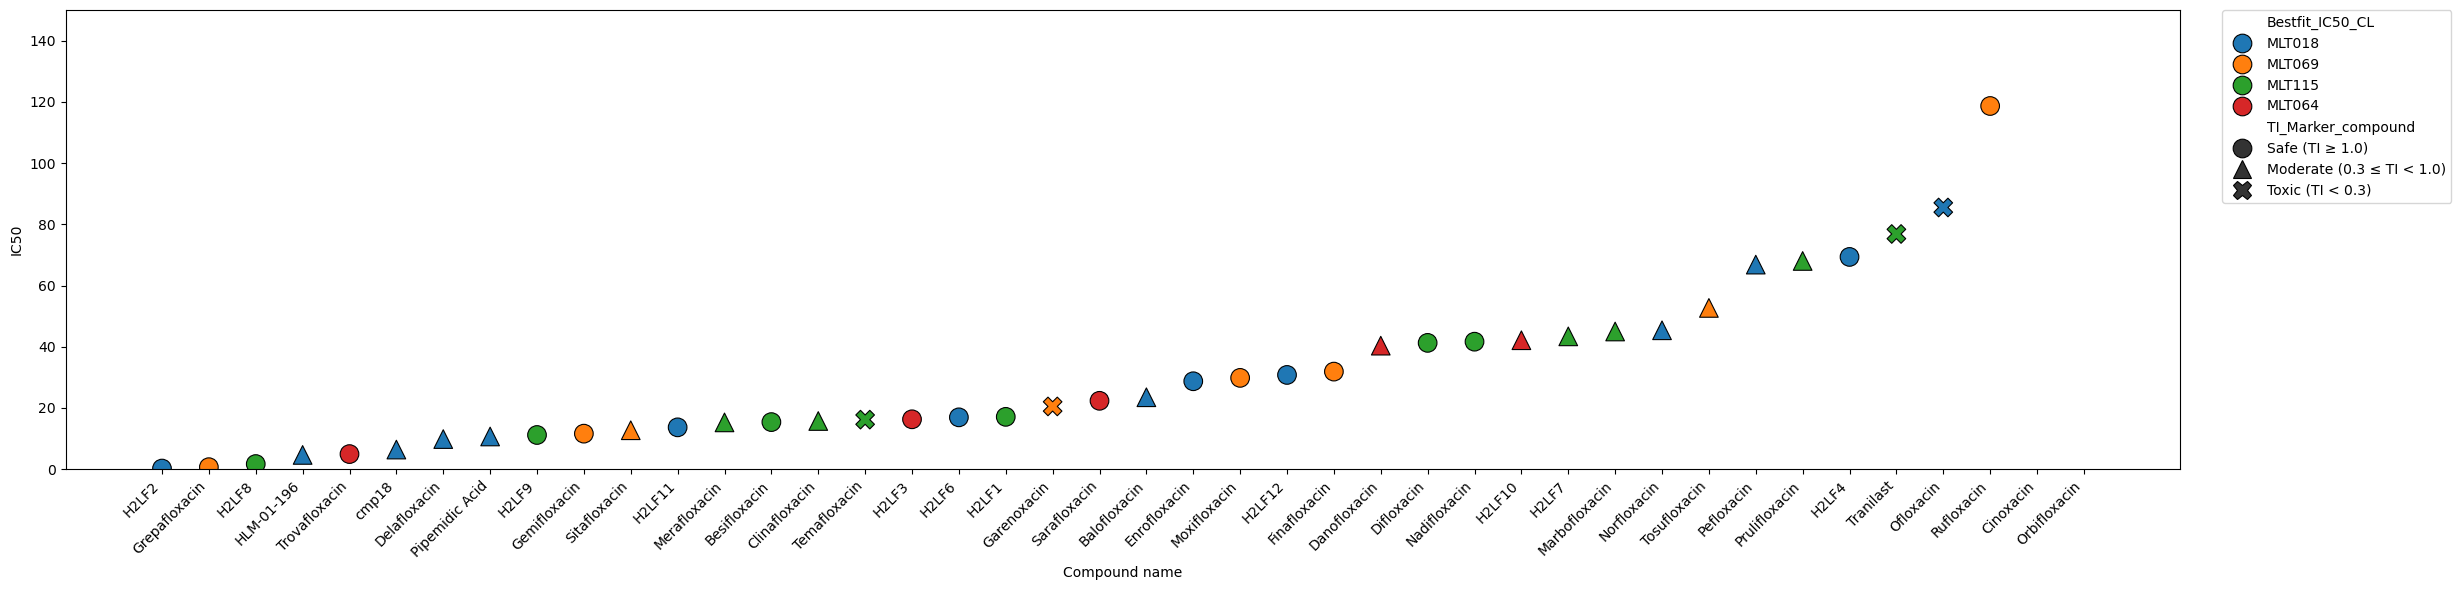

In [39]:
MetaSAR_col = MetaSAR_col.sort_values("IC50", ascending=True)
MetaSAR_col["TI_Marker_compound"] = MetaSAR_col["TI_Marker_compound"].fillna("no_TI")

marker_map = {
    "circle": "o",
    "triangle": "^",
    "cross": "X",
    "no_TI": "P"
}

plt.figure(figsize=(22, 6))

ax = sns.scatterplot(
    data=MetaSAR_col,
    x="Compound name",
    y="IC50",
    hue="Bestfit_IC50_CL",
    style="TI_Marker_compound",
    markers=marker_map,
    s=180,
    edgecolor="black",
    linewidth=0.8,
)

plt.ylim(0, 150)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Get current legend handles
handles, labels = ax.get_legend_handles_labels()

# Build new labels for TI markers
replace_dict = {
    "circle": "Safe (TI ≥ 1.0)",
    "triangle": "Moderate (0.3 ≤ TI < 1.0)",
    "cross": "Toxic (TI < 0.3)",
    "no_TI": "No toxicity data",
}

new_labels = []
for label in labels:
    if label in replace_dict:
        new_labels.append(replace_dict[label])
    else:
        # keep original color labels (cell lines)
        new_labels.append(label)

# Remove old legend
ax.get_legend().remove()

# Add new legend
plt.legend(handles, new_labels, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

plt.show()


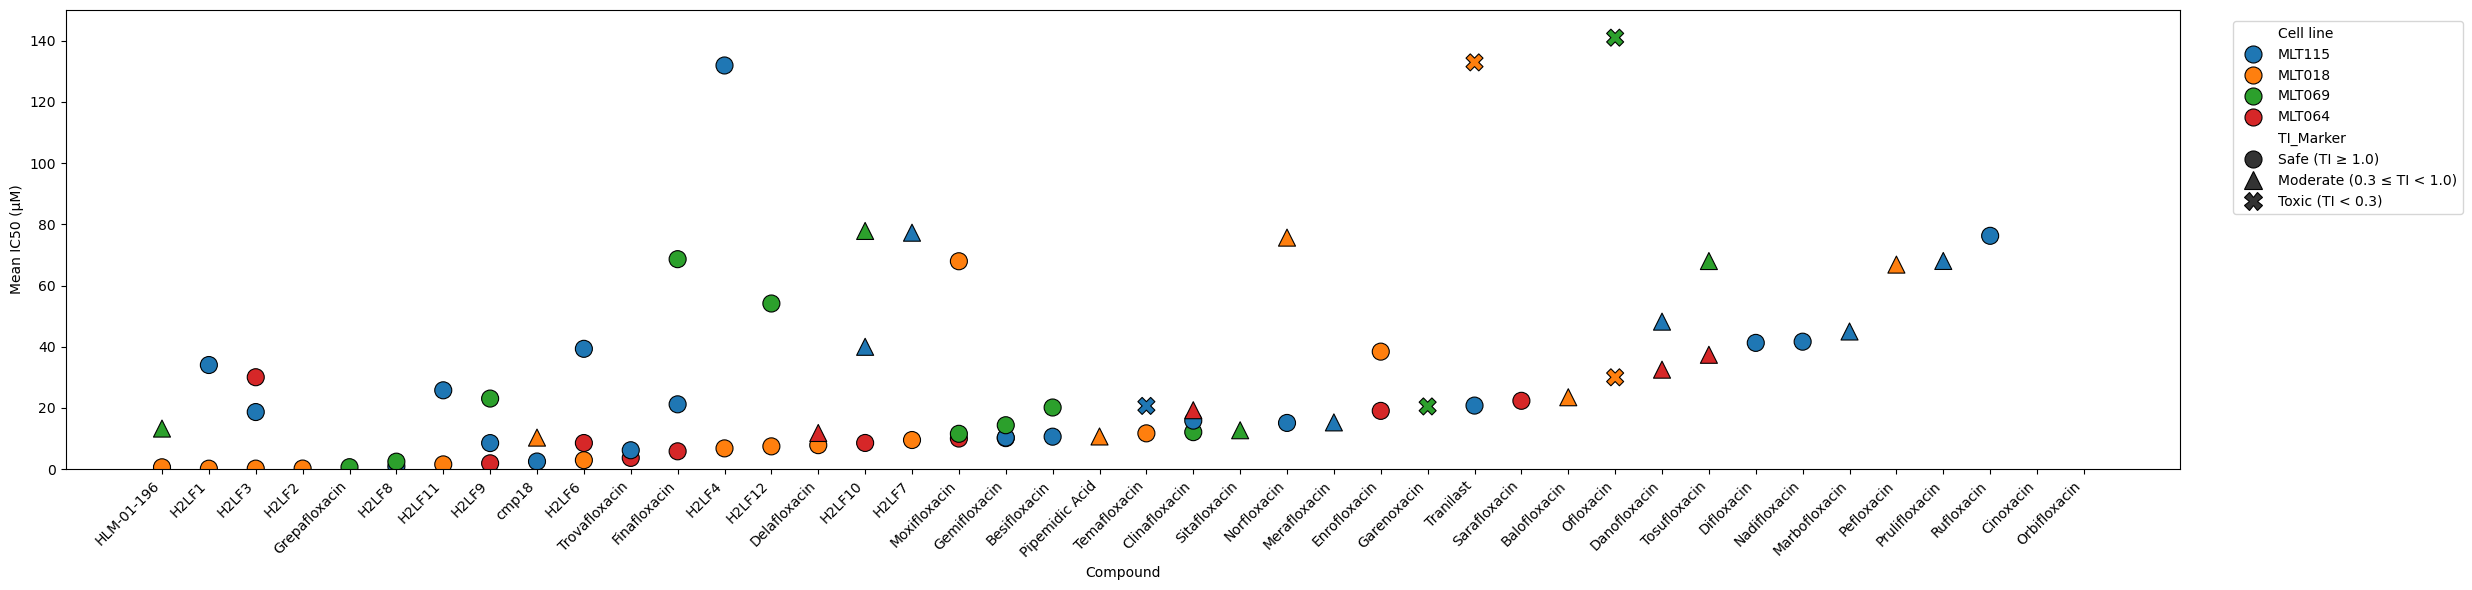

In [41]:
# Assume Fib_Result_List_Final = updated_fib["Result_List_Final"]
col_plot = Col_Result_List_Final.copy()

# Sort by potency
col_plot = col_plot.sort_values("Mean_IC50", ascending=True)

# Use per–cell line TI marker
# (this column is added by label_toxicity_from_ti)
col_plot["TI_Marker"] = col_plot["TI_Marker"].fillna("no_TI")

marker_map = {
    "circle": "o",      # safe
    "triangle": "^",    # moderate
    "cross": "X",       # toxic 
    "no_TI": "P",       # no LD50 data
}

plt.figure(figsize=(22, 6))

ax = sns.scatterplot(
    data=col_plot,
    x="Compound name",
    y="Mean_IC50",
    hue="Cell line",          # color by fibroblast line
    style="TI_Marker",        # marker by TI category
    markers=marker_map,
    s=150,
    edgecolor="black",
    linewidth=0.8,
)

plt.ylim(0, 150)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Compound")
plt.ylabel("Mean IC50 (μM)")
#plt.title("Fibrosis Mean IC50 with TI-based Toxicity Categorization", fontsize=16)
plt.tight_layout()

# ---- legend relabel for TI categories ----
handles, labels = ax.get_legend_handles_labels()

replace_dict = {
    "circle": "Safe (TI ≥ 1.0)",
    "triangle": "Moderate (0.3 ≤ TI < 1.0)",
    "cross": "Toxic (TI < 0.3)",
    "no_TI": "No LD50 toxicity data",
}

new_labels = [replace_dict.get(l, l) for l in labels]

ax.get_legend().remove()
plt.legend(
    handles,
    new_labels,
    loc="upper left",
    bbox_to_anchor=(1.02, 1),
    frameon=True,
    borderaxespad=0.8,
)

plt.show()


# Data Export

In [43]:
Fib_metasar = updated_fib["MetaSAR_df"]
Fib_long = updated_fib["longlist"]
Fib_short = updated_fib["shortlist"]
Fib_result_list = updated_fib['Result_List_Final']

In [44]:
Fib_metasar.to_csv(f'Results/JJ/updated/Fib_metasar.csv')
Fib_long.to_csv(f'Results/JJ/updated/Fib_long.csv')
Fib_short.to_csv(f'Results/JJ/updated/Fib_short.csv')
Fib_result_list.to_csv(f'Results/JJ/updated/Fib_result_list.csv')

In [45]:
Col_metasar = updated_col["MetaSAR_df"]
Col_long = updated_col["longlist"]
Col_short = updated_col["shortlist"]
Col_result_list = updated_col['Result_List_Final']

In [46]:
Col_metasar.to_csv(f'Results/JJ/updated/Col_metasar.csv')
Col_long.to_csv(f'Results/JJ/updated/Col_long.csv')
Col_short.to_csv(f'Results/JJ/updated/Col_short.csv')
Col_result_list.to_csv(f'Results/JJ/updated/Col_result_list.csv')